In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import MultipleLocator

In [2]:
ptrain = pd.read_csv('./Periodic/train.csv')
# Drop the time stamp column
ptest = pd.read_csv('./Periodic/test.csv')
ptrain= ptrain.loc[:, (ptrain != 0).any(axis=0)]

In [3]:
pX_train = ptrain.drop(["TimeStamp","ReadsAvg","WritesAvg","Unnamed: 0"],1)
pX_test = ptest.drop(["TimeStamp","ReadsAvg","WritesAvg","Unnamed: 0"],1)
pY_train_r = ptrain["ReadsAvg"]
pY_test_r = ptest["ReadsAvg"]

In [4]:
ftrain = pd.read_csv('./Flash/train.csv')
# Drop the time stamp column
ftest = pd.read_csv('./Flash/test.csv')
ftrain= ftrain.loc[:, (ftrain != 0).any(axis=0)]

In [5]:
fX_train = ftrain.drop(["TimeStamp","ReadsAvg","WritesAvg","Unnamed: 0"],1)
fX_test = ftest.drop(["TimeStamp","ReadsAvg","WritesAvg","Unnamed: 0"],1)
fY_train_r = ftrain["ReadsAvg"]
fY_test_r = ftest["ReadsAvg"]

### Read files

In [6]:
#  Peridoc Pearson correlation
ppc = pd.read_csv('./Periodic/read_p_c.csv')
ppc_f= ppc.iloc[0:,0].tolist()
pX_train_pc=pX_train[ppc_f]
pX_test_pc=pX_test[ppc_f]
ppc_nmae=[]
ppc_time=[]

#  Flash Pearson correlation
fpc = pd.read_csv('./Flash/read_p_c.csv')
fpc_f= fpc.iloc[0:,0].tolist()
fX_train_pc=fX_train[fpc_f]
fX_test_pc=fX_test[fpc_f]
fpc_nmae=[]
fpc_time=[]

##### Integreted List

In [8]:
ipc_f = list(set(ppc_f).intersection(fpc_f))

In [9]:
ipc_f.sort(key= lambda x: ppc_f.index(x)+fpc_f.index(x))

In [10]:
ipX_train_pc=pX_train[ipc_f]
ipX_test_pc=pX_test[ipc_f]
ippc_nmae=[]
ippc_time=[]

In [11]:
ifX_train_pc=fX_train[ipc_f]
ifX_test_pc=fX_test[ipc_f]
ifpc_nmae=[]
ifpc_time=[]

### Testing

In [12]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model

In [13]:
def fit_RF_reg(X,Y,X_test,Y_test):
    start_time = time.time()
    
    rfr = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 10,verbose = 0)
    rfr.fit(X, Y)
    
    end_time = time.time()
    timec=end_time - start_time

    NMAE=np.mean(np.abs(rfr.predict(X_test) - Y_test))/np.mean(Y_test)
    #R_squared = model_k.score(X,Y)
    return NMAE, timec

In [14]:
def RF_training_f(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    for k in klist:    
        error,timec = fit_RF_reg(X_train_f.iloc[:,0:k],Y_train_r,X_test_f.iloc[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

In [15]:
#klist=[1, 2, 4,8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,     32,40,48,56,64,  96,128,192,256,512,1024]
klist=[]
for k in range(1,10):
    klist.append(2**k)

In [16]:
ppc_nmae=[]
ppc_time=[]
RF_training_f(klist,pX_train_pc,pY_train_r,pX_test_pc,
              pY_test_r,ppc_nmae,ppc_time)

In [17]:
fpc_nmae=[]
fpc_time=[]
RF_training_f(klist,fX_train_pc,fY_train_r,fX_test_pc,
              fY_test_r,fpc_nmae,fpc_time)

In [18]:
ippc_nmae=[]
ippc_time=[]
RF_training_f(klist,ipX_train_pc,pY_train_r,ipX_test_pc,
              pY_test_r,ippc_nmae,ippc_time)

In [19]:
ifpc_nmae=[]
ifpc_time=[]
RF_training_f(klist,ifX_train_pc,fY_train_r,ifX_test_pc,
              fY_test_r,ifpc_nmae,ifpc_time)

### Plot

<ipython-input-22-1e96d560feb1>:38: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log",basex=2)


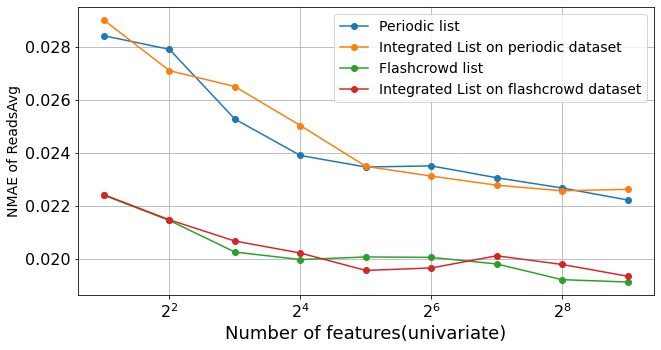

In [22]:
#a=[1, 2,3, 4, 5,6,7,8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,     32,40,48,56,64,  96,128,192,256,512,1024]
#a = [0,1,3,7,9,11,15,19,21,23,24,25,26,27,28,29]

def sortindex(list,indexs):
    _ = []
    for a in indexs:
        _.append(list[a])
    return _

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,ppc_nmae,marker='o')
plt.plot(klist,ippc_nmae,marker='o')
plt.plot(klist,fpc_nmae,marker='o')
plt.plot(klist,ifpc_nmae,marker='o')
# plt.plot(klist,r_arr_nmae,marker='o')
# plt.plot(klist,r_pca_nmae,marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_pc_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_tb_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_arr_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_pca_nmae,a),marker='o')


font_size=18
plt.xlabel('Number of features(univariate)', fontsize=font_size)
plt.ylabel('NMAE of ReadsAvg', fontsize=font_size-4)
plt.legend(('Periodic list','Integrated List on periodic dataset','Flashcrowd list','Integrated List on flashcrowd dataset'), 
           loc=1, shadow=False, fancybox=True, fontsize=font_size-4)
#  bbox_to_anchor=(1.01,1.0), borderaxespad = 0.,
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

#x_major_locator=MultipleLocator(8)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)

ax.set_xscale("log",basex=2)
#ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
#ax.set_ylim(0.021, 0.035)
plt.grid()
plt.savefig("./Fig/pc_i_compare.png",dpi=300,bbox_inches='tight')

In [ ]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,r_pc_time,marker='o')
plt.plot(klist,r_tb_time,marker='o')
plt.plot(klist,r_arr_time,marker='o')
plt.plot(klist,r_pca_time,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('Training time (s)', fontsize=font_size-2)
plt.legend(('Univariate','Tree-based',
            'ARR','PCA'), loc = 2, shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)
#ax.set_xscale("log",basex=2)
#ax.set_yscale("log",basey=2)
#ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
ax.set_xlim(0,200)
ax.set_ylim(0,6)

plt.grid()
plt.savefig("./Fig/periodic_time1.png",dpi=300,bbox_inches='tight')

In [86]:
X_train_arr.shape

(10136, 1746)

In [87]:
X_test_arr.shape

(4345, 1746)

In [154]:
print(r_pc_time)
print(r_tb_time)
print(r_arr_time)
print(r_pca_time)

[0.11025094985961914, 0.1082301139831543, 0.10823488235473633, 0.20908141136169434, 0.20855498313903809, 0.20871615409851074, 0.20869970321655273, 0.308868408203125, 0.3095700740814209, 0.40948486328125, 0.4098384380340576, 0.5100200176239014, 0.5096621513366699, 0.6101195812225342, 0.7109758853912354, 0.7108662128448486, 0.8107385635375977, 0.8110721111297607, 0.911362886428833, 0.9114270210266113, 1.1128308773040771, 1.31304931640625, 1.6141669750213623, 1.7144603729248047, 2.61845326423645, 3.4223780632019043, 4.827849626541138, 6.042173147201538, 9.280692338943481, 15.102791786193848]
[0.10915637016296387, 0.10806560516357422, 0.2085425853729248, 0.2087094783782959, 0.20837640762329102, 0.20828723907470703, 0.30906009674072266, 0.3091254234313965, 0.4091644287109375, 0.4091935157775879, 0.509434700012207, 0.6099522113800049, 0.6097030639648438, 0.7102608680725098, 0.7101824283599854, 0.8104884624481201, 0.810936450958252, 0.8108189105987549, 0.9118568897247314, 0.9116325378417969, 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


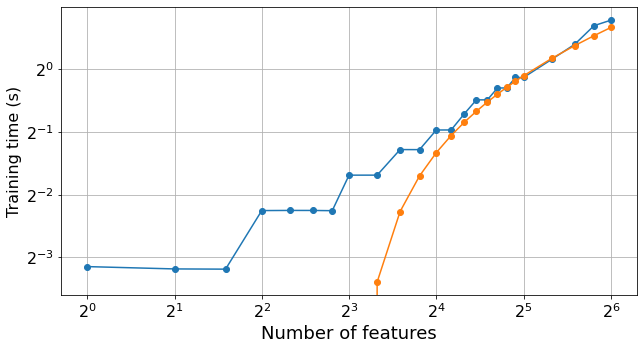

In [114]:
y = np.sqrt(klist)/5 
y2 = [_**(0.3)-1.9 for _ in klist]
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,r_pc_time,marker='o')
#plt.plot(klist,y,marker='o')
plt.plot(klist,y2,marker='o')
# plt.plot(klist,r_tb_time,marker='o')
# plt.plot(klist,r_arr_time,marker='o')
# plt.plot(klist,r_pca_time,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('Training time (s)', fontsize=font_size-2)
#plt.legend(('Univariate','Tree-based',
#            'ARR','PCA'), loc = 2, shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xscale("log",basex=2)
ax.set_yscale("log",basey=2)
plt.grid()
#plt.savefig("./Fig/periodic_time.png",dpi=300,bbox_inches='tight')

In [155]:
print(r_pc_nmae)
print(r_tb_nmae)
print(r_arr_nmae)
print(r_pca_nmae)

[0.02688426717409696, 0.02984268461519349, 0.025493544932640083, 0.025319259850260286, 0.025077256468138603, 0.02518787797931604, 0.024701703373378667, 0.024775847785562903, 0.025019769258031444, 0.024789913863662763, 0.024399296137638686, 0.024274376145996528, 0.02427880955102306, 0.024392776825804364, 0.024560707781685464, 0.02430176365262376, 0.02454773127724111, 0.024285201993284128, 0.024092596138741918, 0.02406062562294787, 0.024498156477594225, 0.023719229303553215, 0.023665173409733623, 0.023353230647000057, 0.02310143721762286, 0.023169676603508865, 0.023024969316238028, 0.022975019786791975, 0.02263993578367048, 0.022542296162522124]
[0.03155552253173212, 0.02856750790694559, 0.02764167958046594, 0.027137577144485954, 0.02703547862928472, 0.02685659298319877, 0.02695131665972863, 0.026925653321291154, 0.027208505211542448, 0.027373443139055834, 0.027216951493771416, 0.02696336733695661, 0.026834765249896378, 0.0269486810121776, 0.026597417685112396, 0.026616565493958112, 0.02

In [ ]:
# [1, 2,3, 4, 5,6,7,8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,     32,40,48,56,64,  96,128,192,256,512,1024]